In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Input, Flatten, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils import to_categorical 
import pathlib
import os
import shutil
import PIL
import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img



In [2]:
input_dir = '/kaggle/input/yikes-spiders-15-species'  
output_dir = '/kaggle/working/'  


In [106]:
shutil.rmtree("/kaggle/working/train")    
shutil.rmtree("/kaggle/working/val")         
shutil.rmtree("/kaggle/working/test")

In [3]:
def copy_structure(src, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)
    
    for dirpath, dirnames, filenames in os.walk(src):
        dest_path = dirpath.replace(src, dest, 1)
        if not os.path.exists(dest_path):
            os.makedirs(dest_path)
        
        for filename in tqdm(filenames):
            src_file = os.path.join(dirpath, filename)
            dest_file = os.path.join(dest_path, filename)
            shutil.copy2(src_file, dest_file)


In [4]:
copy_structure(os.path.join(input_dir, 'train'), os.path.join(output_dir, 'train'))
copy_structure(os.path.join(input_dir, 'test'), os.path.join(output_dir, 'test'))
copy_structure(os.path.join(input_dir, 'valid'), os.path.join(output_dir, 'val'))


0it [00:00, ?it/s]
100%|██████████| 154/154 [00:00<00:00, 200.04it/s]
0it [00:00, ?it/s]
100%|██████████| 5/5 [00:00<00:00, 202.52it/s]
0it [00:00, ?it/s]
100%|██████████| 5/5 [00:00<00:00, 208.94it/s]


In [5]:
train_datagen = ImageDataGenerator()

dir_ = '/kaggle/working/train'
for folder_name in os.listdir(dir_):
    folder_path = os.path.join(dir_, folder_name)
    if os.path.isdir(folder_path):

          for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = load_img(file_path)
                    x = img_to_array(img)
                    x = np.expand_dims(x, axis=0)

                    i = 0    
                    
                    for batch in train_datagen.flow(x, batch_size=1):
                        augmented_img = array_to_img(batch[0])
                        augmented_img.save(os.path.join(folder_path, f'{filename[:-4]}_aug_{i}.jpg'))
                        i += 1
                        if i >= 1:  
                            break

In [6]:
val_datagen = ImageDataGenerator()
    
dir_ = '/kaggle/working/val'
for folder_name in os.listdir(dir_):
    folder_path = os.path.join(dir_, folder_name)
    if os.path.isdir(folder_path):

          for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = load_img(file_path)
                    x = img_to_array(img)
                    x = np.expand_dims(x, axis=0)

                    i = 0    
                    
                    for batch in val_datagen.flow(x, batch_size=1):
                        augmented_img = array_to_img(batch[0])
                        augmented_img.save(os.path.join(folder_path, f'{filename[:-4]}_aug_{i}.jpg'))
                        i += 1
                        if i >= 5:  
                            break

In [7]:
test_datagen = ImageDataGenerator()
    
dir_ = '/kaggle/working/test'
for folder_name in os.listdir(dir_):
    folder_path = os.path.join(dir_, folder_name)
    if os.path.isdir(folder_path):

          for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = load_img(file_path)
                    x = img_to_array(img)
                    x = np.expand_dims(x, axis=0)

                    i = 0    
                    
                    for batch in test_datagen.flow(x, batch_size=1):
                        augmented_img = array_to_img(batch[0])
                        augmented_img.save(os.path.join(folder_path, f'{filename[:-4]}_aug_{i}.jpg'))
                        i += 1
                        if i >= 4:  
                            break


In [8]:
print(len(os.listdir("/kaggle/working/train/Black Widow")))

244


In [8]:
train_data_link = "/kaggle/working/train"
val_data_link = "/kaggle/working/val"
test_data_link = "/kaggle/working/test"

train_data = pathlib.Path(train_data_link)
val_data = pathlib.Path(val_data_link)
test_data = pathlib.Path(test_data_link)

In [9]:
list_of_classes = os.listdir("/kaggle/working/train")
print(list_of_classes)

['Red Knee Tarantula', 'Black Widow', 'Blue Tarantula', 'Golden Orb Weaver', 'Bold Jumper', 'Peacock Spider', 'Yellow Garden Spider', 'Brown Recluse Spider', 'Spiny-backed Orb-weaver', 'Deinopis Spider', 'Hobo Spider', 'White Kneed Tarantula', 'Huntsman Spider', 'Ladybird Mimic Spider', 'Brown Grass Spider']


In [10]:
def create_dict(c_dir, list_of_classes):
    dictionary = {}
    for spider in list_of_classes:
        t_list = list(c_dir.glob(f"{spider}/*"))
        dictionary[spider] = t_list
    return dictionary
    

In [11]:
train_total_dict = create_dict(train_data, list_of_classes)
val_total_dict = create_dict(val_data, list_of_classes)
test_total_dict = create_dict(test_data, list_of_classes)

In [ ]:
train_total_dict

In [13]:
len(train_total_dict)

15

In [14]:
train_total_dict["Peacock Spider"][:5]

[PosixPath('/kaggle/working/train/Peacock Spider/156_aug_0.jpg'),
 PosixPath('/kaggle/working/train/Peacock Spider/036_aug_0.jpg'),
 PosixPath('/kaggle/working/train/Peacock Spider/155_aug_0.jpg'),
 PosixPath('/kaggle/working/train/Peacock Spider/120.jpg'),
 PosixPath('/kaggle/working/train/Peacock Spider/051.jpg')]

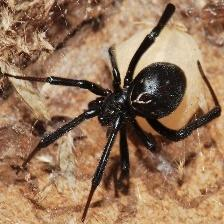

In [15]:
PIL.Image.open(str(train_total_dict["Black Widow"][0]))

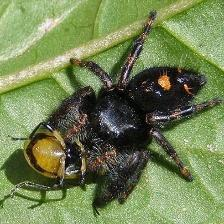

In [16]:
PIL.Image.open(str(train_total_dict["Bold Jumper"][1]))

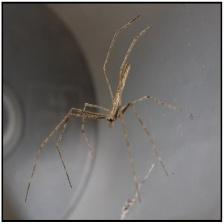

In [17]:
PIL.Image.open(str(train_total_dict["Deinopis Spider"][0]))

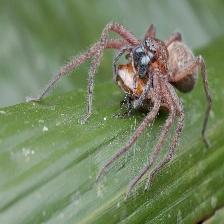

In [18]:
PIL.Image.open(str(train_total_dict["Huntsman Spider"][2]))

In [19]:
keys = list(train_total_dict.keys())
features = {}
poisoness = {}

for num, obj in enumerate(keys):
    features[obj] = num
    
for num, obj in enumerate(keys):
    if obj in ["Black Widow", "Brown Recluse Spider", "Hobo Spider"]:
        poisoness[obj] = 0
    elif obj in ["Golden Orb Weaver", "Huntsman Spider", "White Kneed Tarantula", "Red Knee Tarantula", "Blue Tarantula", "Spiny-backed Orb-weaver", "Blue Tarantula"]:
        poisoness[obj] = 1
    elif obj in ["Bold Jumper", "Deinopis Spider", "Ladybird Mimic Spider", "Peacock Spider", "Yellow Garden Spider", "Brown Grass Spider"]:
        poisoness[obj] = 2

In [20]:
features

{'Red Knee Tarantula': 0,
 'Black Widow': 1,
 'Blue Tarantula': 2,
 'Golden Orb Weaver': 3,
 'Bold Jumper': 4,
 'Peacock Spider': 5,
 'Yellow Garden Spider': 6,
 'Brown Recluse Spider': 7,
 'Spiny-backed Orb-weaver': 8,
 'Deinopis Spider': 9,
 'Hobo Spider': 10,
 'White Kneed Tarantula': 11,
 'Huntsman Spider': 12,
 'Ladybird Mimic Spider': 13,
 'Brown Grass Spider': 14}

In [21]:
poisoness

{'Red Knee Tarantula': 1,
 'Black Widow': 0,
 'Blue Tarantula': 1,
 'Golden Orb Weaver': 1,
 'Bold Jumper': 2,
 'Peacock Spider': 2,
 'Yellow Garden Spider': 2,
 'Brown Recluse Spider': 0,
 'Spiny-backed Orb-weaver': 1,
 'Deinopis Spider': 2,
 'Hobo Spider': 0,
 'White Kneed Tarantula': 1,
 'Huntsman Spider': 1,
 'Ladybird Mimic Spider': 2,
 'Brown Grass Spider': 2}

In [22]:
def split_data(main_data_dict, features_dict):
    x = []
    y_1 = []
    y_2 = []
    
    for name, images in main_data_dict.items():
        for image in images:
            image = cv2.imread(str(image))
            t_resized_image = cv2.resize(image, (256, 256))
            resized_image = cv2.cvtColor(t_resized_image, cv2.COLOR_BGR2RGB)
            x.append(resized_image)
            y_1.append(features_dict[name])
            y_2.append(poisoness[name])
    return x, (np.array(y_1), np.array(y_2))



x_train, y_train = split_data(train_total_dict, features)
x_val, y_val = split_data(val_total_dict, features)
x_test, y_test = split_data(test_total_dict, features)

In [25]:
len(x_train), len(y_train)

(4370, 2)

In [26]:
len(x_val), len(y_val)

(450, 2)

In [27]:
len(x_test), len(y_test)

(375, 2)

In [28]:
danger_level = ["high", "meduim", "low"]

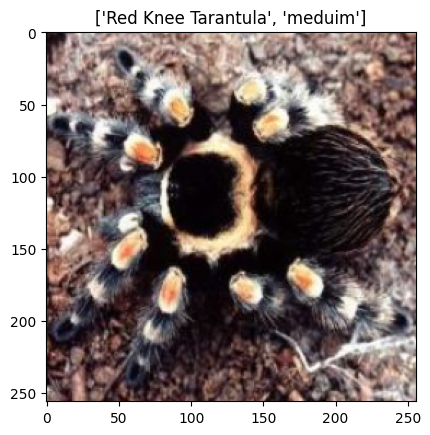

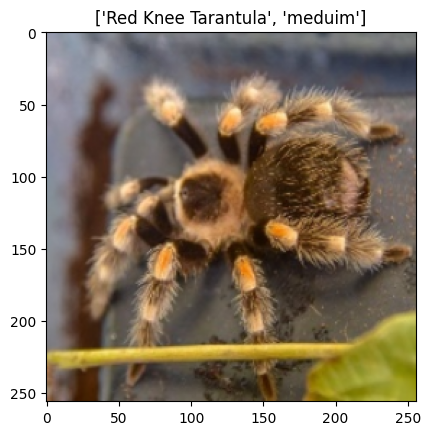

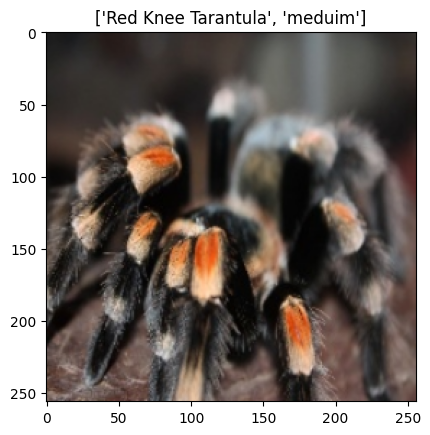

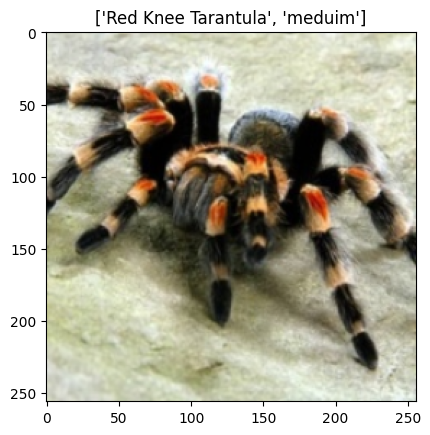

In [29]:
def output(x, y, num, lst1, lst2):
    for i in range(num):
        plt.imshow(x[i])
        plt.title([lst1[y[0][i]], lst2[y[1][i]]])
        plt.show()
        

output(x_train, y_train, 4, list_of_classes, danger_level)

In [39]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, BatchNormalization, Dropout, Dense, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

height = 256
width = 256
channels = 3


inputs = Input(shape=(height, width, channels))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


x = Flatten()(x)

x1 = Dense(256, kernel_regularizer=l2(0.001))(x)
x1 = LeakyReLU()(x1)
x1 = Dropout(0.7)(x1)
x1 = BatchNormalization()(x1)

out_1 = Dense(15, activation="softmax", name='output_1')(x1)

x2 = Dense(256, kernel_regularizer=l2(0.001))(x)
x2 = LeakyReLU()(x2)
x2 = Dropout(0.7)(x2)
x2 = BatchNormalization()(x2)

x2 = Dense(32)(x2)
x2 = LeakyReLU()(x2)
x2 = Dropout(0.7)(x2)
x2 = BatchNormalization()(x2)


out_2 = Dense(3, activation="softmax", name='output_2')(x2)

model = Model(inputs=inputs, outputs=[out_1, out_2])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 128, 128,  │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 64, 64,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 32, 32,    │          0 │ max_pooling2d_17… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_18… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 16, 16,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │    295,168 │ max_pooling2d_19… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 8, 8, 256) │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 4, 4, 256) │          0 │ max_pooling2d_20… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 4, 4, 512) │  1,180,160 │ max_pooling2d_21… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 2, 2, 512) │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 1, 1, 512) │          0 │ max_pooling2d_22… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 512)       │          0 │ max_pooling2d_23… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    131,328 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_8       │ (None, 256)       │          0 │ dense_8[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ leaky_re_lu_8[0]

 Total params: 1,845,586 (7.04 MB)

 Trainable params: 1,844,498 (7.04 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [40]:
from keras.optimizers import RMSprop, Adam, SGD

model.compile(optimizer=RMSprop(learning_rate=1e-4),
             loss={"output_1": "categorical_crossentropy", "output_2": "categorical_crossentropy"},
             metrics={"output_1": "accuracy", "output_2": "accuracy"})

In [33]:
x_train_ar = np.array(x_train)

x_val_ar = np.array(x_val)

x_test_ar = np.array(x_test)

In [34]:
x_train_n = x_train_ar / 255
x_val_n = x_val_ar / 255
x_test_n = x_test_ar / 255

In [36]:
from tensorflow.keras.utils import to_categorical

# for 1st output 
y_train_ct_0 = to_categorical(np.array(y_train[0]).reshape(-1), num_classes=15)
y_val_ct_0 = to_categorical(np.array(y_val[0]).reshape(-1), num_classes=15)
y_test_ct_0 = to_categorical(np.array(y_test[0]).reshape(-1), num_classes=15)

# for 2nd output
y_train_ct_1 = to_categorical(np.array(y_train[1]).reshape(-1), num_classes=3)
y_val_ct_1 = to_categorical(np.array(y_val[1]).reshape(-1), num_classes=3)
y_test_ct_1 = to_categorical(np.array(y_test[1]).reshape(-1), num_classes=3)


print("y_train_ct_0 shape:", y_train_ct_0.shape)  
print("y_val_ct_0 shape:", y_val_ct_0.shape) 
print("y_test_ct_0 shape:", y_test_ct_0.shape) 


print("y_train_ct_1 shape:", y_train_ct_1.shape)  
print("y_val_ct_1 shape:", y_val_ct_1.shape)   
print("y_test_ct_1 shape:", y_test_ct_1.shape) 


y_train_ct = (y_train_ct_0, y_train_ct_1)
y_val_ct = (y_val_ct_0, y_val_ct_1)
y_test_ct = (y_test_ct_0, y_test_ct_1)


y_train_ct_0 shape: (4370, 15)
y_val_ct_0 shape: (450, 15)
y_test_ct_0 shape: (375, 15)
y_train_ct_1 shape: (4370, 3)
y_val_ct_1 shape: (450, 3)
y_test_ct_1 shape: (375, 3)


In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop


history = model.fit(
    x_train_n, y_train_ct,
    epochs=100, 
    batch_size=16,
    validation_data=(x_val_n, y_val_ct)
)


Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 4.9587 - output_1_accuracy: 0.1036 - output_2_accuracy: 0.3389 - val_loss: 4.3528 - val_output_1_accuracy: 0.2533 - val_output_2_accuracy: 0.5178
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 4.1951 - output_1_accuracy: 0.2374 - output_2_accuracy: 0.3941 - val_loss: 3.5788 - val_output_1_accuracy: 0.3600 - val_output_2_accuracy: 0.6156
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 3.6603 - output_1_accuracy: 0.3751 - output_2_accuracy: 0.4597 - val_loss: 3.1821 - val_output_1_accuracy: 0.4689 - val_output_2_accuracy: 0.4800
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 3.3785 - output_1_accuracy: 0.4594 - output_2_accuracy: 0.4897 - val_loss: 2.8913 - val_output_1_accuracy: 0.5600 - val_output_2_accuracy: 0.5067
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 3.1201 - output_1_accuracy: 0.4896 - output_2_accuracy: 0.5259 - val_loss: 2.3954 - val_output_1_accuracy

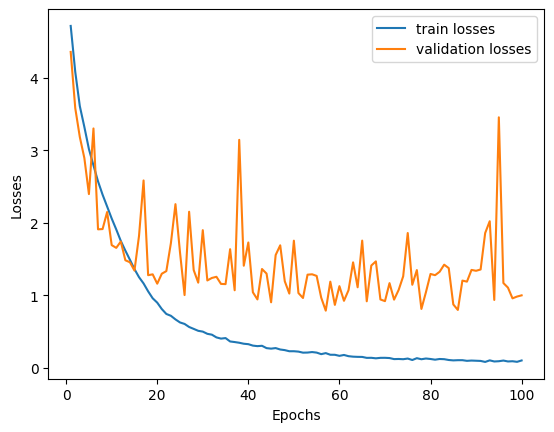

In [93]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(range(1, len(train_loss) + 1), train_loss, label="train losses")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="validation losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

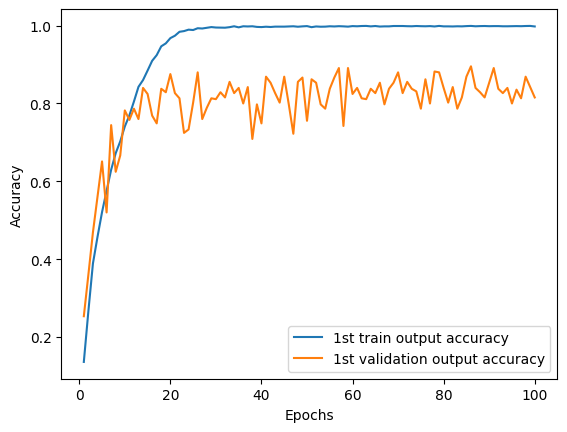

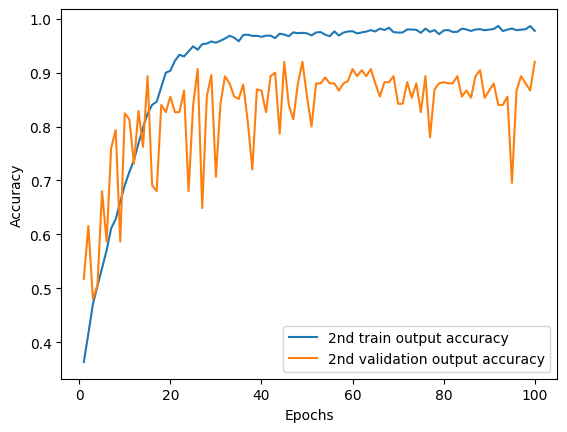

In [97]:
train_accuracy_1 = history.history["output_1_accuracy"]
val_accuracy_1 = history.history["val_output_1_accuracy"]

plt.plot(range(1, len(train_accuracy_1)+1), train_accuracy_1, label="1st train output accuracy")
plt.plot(range(1, len(val_accuracy_1)+1), val_accuracy_1, label="1st validation output accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

train_accuracy_2 = history.history["output_2_accuracy"]
val_accuracy_2 = history.history["val_output_2_accuracy"]

plt.plot(range(1, len(train_accuracy_2)+1), train_accuracy_2, label="2nd train output accuracy")
plt.plot(range(1, len(val_accuracy_2)+1), val_accuracy_2, label="2nd validation output accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
model.evaluate(x_test_n, y_test_ct)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.6204 - output_1_accuracy: 0.9478 - output_2_accuracy: 0.8855


[0.8307385444641113, 0.8933333158493042, 0.8933333158493042]

Blue Tarantula / meduim


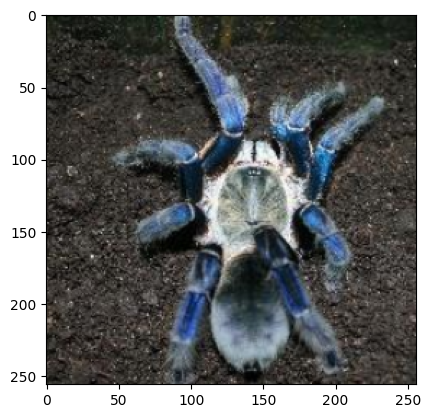

In [43]:
plt.imshow(x_test[70])
print(list_of_classes[y_test[0][70]],"/", danger_level[y_test[1][70]])

In [44]:
x_test[0] = x_test[0] / 255

In [45]:
image = np.expand_dims(x_test[70], axis=0)  
res = model.predict(image)
res_1 = np.argmax(res[0])
res_2 = np.argmax(res[1])
print(list_of_classes[res_1],"/", danger_level[res_2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
Blue Tarantula / meduim


In [47]:
x_test = np.array(x_test)

In [48]:
y_pred = model.predict(x_test) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [49]:
y_pred_class = []
for arr in y_pred[0]:
    t_num = np.argmax(arr)
    y_pred_class.append(t_num)

y_pred_class = np.array(y_pred_class)

In [50]:
y_pred_venomus = []
for arr in y_pred[1]:
    t_num = np.argmax(arr)
    y_pred_venomus.append(t_num)

y_pred_venomus = np.array(y_pred_venomus)

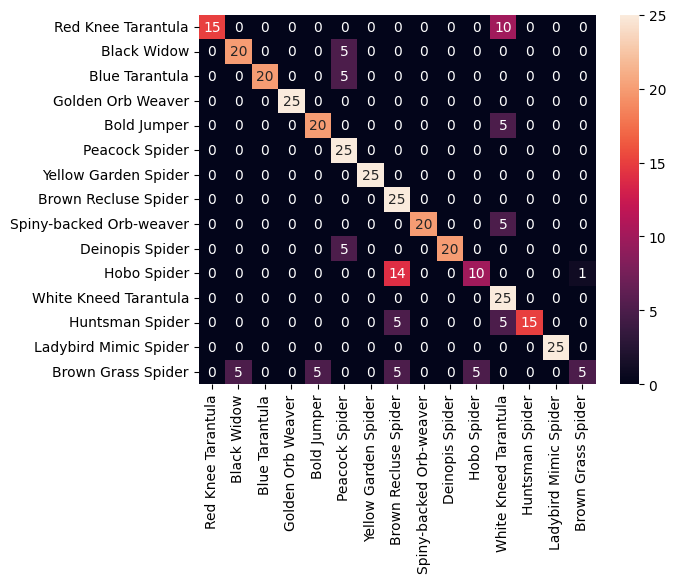

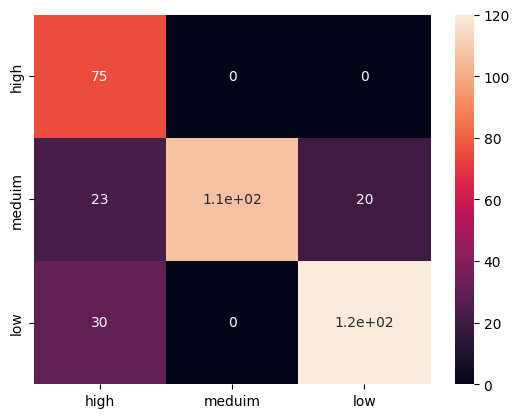

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm_1 = confusion_matrix(y_test[0], y_pred_class)
cm_2 = confusion_matrix(y_test[1], y_pred_venomus)

sns.heatmap(cm_1, annot=True, xticklabels=list_of_classes, yticklabels=list_of_classes)
plt.show()


sns.heatmap(cm_2, annot=True, xticklabels=danger_level, yticklabels=danger_level)
plt.show()

In [52]:
os.makedirs("/kaggle/working/weights")

In [53]:
model.save("/kaggle/working/weights/weights.h5")

In [56]:
model.load_weights("/kaggle/working/weights/weights.h5")

In [57]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 128, 128,  │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 64, 64,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 32, 32,    │          0 │ max_pooling2d_17… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_18… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 16, 16,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │    295,168 │ max_pooling2d_19… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 8, 8, 256) │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 4, 4, 256) │          0 │ max_pooling2d_20… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 4, 4, 512) │  1,180,160 │ max_pooling2d_21… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 2, 2, 512) │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 1, 1, 512) │          0 │ max_pooling2d_22… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 512)       │          0 │ max_pooling2d_23… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    131,328 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_8       │ (None, 256)       │          0 │ dense_8[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ leaky_re_lu_8[0]

 Total params: 3,690,086 (14.08 MB)

 Trainable params: 1,844,498 (7.04 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 1,844,500 (7.04 MB)

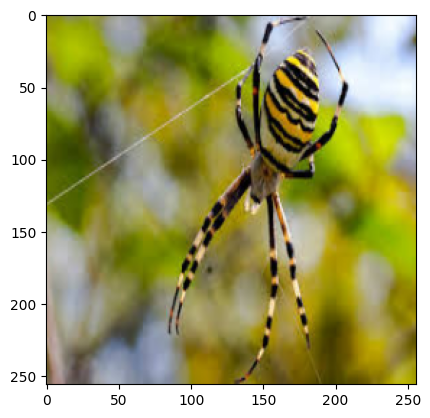

In [82]:
import cv2 

img = cv2.imread("/kaggle/input/spiders/spider/yellow.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (256, 256))
plt.imshow(img_rgb)

In [83]:
img_ = np.array(img_rgb)
img_ = img_ / 255

In [84]:
img_.shape

(256, 256, 3)

In [85]:
# now my test image has (256, 256, 3) shape, but model needs it to have also a batch dimension, 
# so this way, we're adding a batch axis
img_ = np.expand_dims(img_, axis=0)

In [87]:
res = model.predict(img_)
class_res = np.argmax(res[0])
level_res = np.argmax(res[1])
print(list_of_classes[class_res], "/", danger_level[level_res])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Yellow Garden Spider / low
